This notebook analyzes data from the Grammy Awards, focusing on nominations and wins by artists. It explores the dataset's structure, checks for data quality, and visualizes the performance of top artists.

## Importing Libraries 


We import the following libraries:

- `sys` and `os` for system and path operations.
- `matplotlib.pyplot as plt` and `seaborn as sns` for data visualization.
- `pandas as pd` for data manipulation.

In [2]:
import sys
import os
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Database Connection 

We use a custom function `conectar_db()` from a parent directory module to connect to the database. The connection is successful, as indicated by the output: "✅ Conexión exitosa con psycopg2".

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from conexion_db import conectar_db

conexion = conectar_db()

✅ Conexión exitosa con psycopg2


## Loading Data 


We load the data from the "grammy_awards" table into a pandas DataFrame `df` using `pd.read_sql()`. The dataset contains 4810 rows and 11 columns, including fields like `year`, `category`, `nominee`, `artist`, `winner`, etc.

In [6]:
df = pd.read_sql("SELECT * FROM grammy_awards ;", conexion)
df

/tmp/ipykernel_8213/2314985770.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM grammy_awards ;", conexion)


,id,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28,2020-05-19 05:10:28,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True
...,...,...,...,...,...,...,...,...,...,...,...
4805,4806,1958,1st Annual GRAMMY Awards (1958),2017-11-28 00:03:45,2019-09-10 01:11:09,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,NaN,"Van Cliburn, artist (Symphony Of The Air Orche...",NaN,True
4806,4807,1958,1st Annual GRAMMY Awards (1958),2017-11-28 00:03:45,2019-09-10 01:11:09,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,NaN,"Andres Segovia, artist",https://www.grammy.com/sites/com/files/styles/...,True
4807,4808,1958,1st Annual GRAMMY Awards (1958),2017-11-28 00:03:45,2019-09-10 01:11:09,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,NaN,"Hollywood String Quartet (Alvin Dinkin, Paul S...",NaN,True
4808,4809,1958,1st Annual GRAMMY Awards (1958),2017-11-28 00:03:45,2019-09-10 01:11:09,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,NaN,NaN,NaN,True



# Data Exploration

### Dataset Dimensions

We check the shape of the DataFrame:

- Output: "Dimensiones del dataset: (4810, 11)"
- This confirms 4810 entries across 11 columns.

In [ ]:

print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (4810, 11)


### Data Types 

We examine the data types of each column:

- This shows a mix of numerical, string, datetime, and boolean types.

In [ ]:
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
id                       int64
year                     int64
title                   object
published_at    datetime64[ns]
updated_at      datetime64[ns]
category                object
nominee                 object
artist                  object
workers                 object
img                     object
winner                    bool
dtype: object


### Missing Values 

In [ ]:
print("\nValores nulos:")
print(df.applymap(lambda x: x in ["NaN", "None", "null"]).sum())  



Valores nulos:
id                 0
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64


/tmp/ipykernel_8213/2803965490.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: x in ["NaN", "None", "null"]).sum())


- Significant missing data in `artist`, `workers`, and `img` columns.

### Duplicates 

We check for duplicate rows:

- No duplicate entries exist in the dataset.

In [ ]:
print("\nDuplicados:", df.duplicated().sum())


Duplicados: 0


### Unique Award Categories 

We list unique award categories:

- Examples include "Record Of The Year," "Album Of The Year," "Song Of The Year," "Best New Artist," and many others.
- The output is truncated due to the large number of categories (over 442,000 characters), indicating a diverse range of awards.

In [16]:
print("🔹 Categorías únicas de premios:")
print(df["category"].unique())


🔹 Categorías únicas de premios:
['Record Of The Year' 'Album Of The Year' 'Song Of The Year'
 'Best Jazz Performance By A Group' 'Best New Artist'
 'Best Pop Solo Performance' 'Best Pop Duo/Group Performance'
 'Best Traditional Pop Vocal Album' 'Best Pop Vocal Album'
 'Best Dance Recording' 'Best Dance/Electronic Album'
 'Best Contemporary Instrumental Album' 'Best Rock Performance'
 'Best Metal Performance' 'Best Jazz Performance By A Big Band'
 'Best Rock Song' 'Best Rock Album' 'Best Alternative Music Album'
 'Best R&B Performance' 'Best Traditional R&B Performance'
 'Best Large Jazz Ensemble Album' 'Best R&B Song'
 'Best Urban Contemporary Album' 'Best R&B Album' 'Best Rap Performance'
 'Best Rap/Sung Performance' 'Best Country Song' 'Best Rap Song'
 'Best Rap Album' 'Best Country Solo Performance'
 'Best Country Duo/Group Performance' 'Best Recording Package'
 'Best Country Album' 'Best New Age Album' 'Best Improvised Jazz Solo'
 'Best Jazz Vocal Album' 'Best Jazz Instrumental Alb

# Visualization: Nominations vs. Wins by Artist

In [ ]:
nominees_per_artist = df['artist'].value_counts()
winners_per_artist = df[df['winner'] == True]['artist'].value_counts()


We create a plot to compare the number of nominations and wins for the top 10 artists with the most nominations.

In [ ]:
print("Top 10 artistas con más nominaciones:")
print(nominees_per_artist.head(10))

print("\nTop 10 artistas con más premios:")
print(winners_per_artist.head(10))

Top 10 artistas con más nominaciones:
artist
NaN                  1840
(Various Artists)      66
U2                     18
Aretha Franklin        16
Ella Fitzgerald        13
Beyoncé                13
Stevie Wonder          13
Bruce Springsteen      13
Tony Bennett           12
Jimmy Sturr            12
Name: count, dtype: int64

Top 10 artistas con más premios:
artist
NaN                  1840
(Various Artists)      66
U2                     18
Aretha Franklin        16
Ella Fitzgerald        13
Beyoncé                13
Stevie Wonder          13
Bruce Springsteen      13
Tony Bennett           12
Jimmy Sturr            12
Name: count, dtype: int64


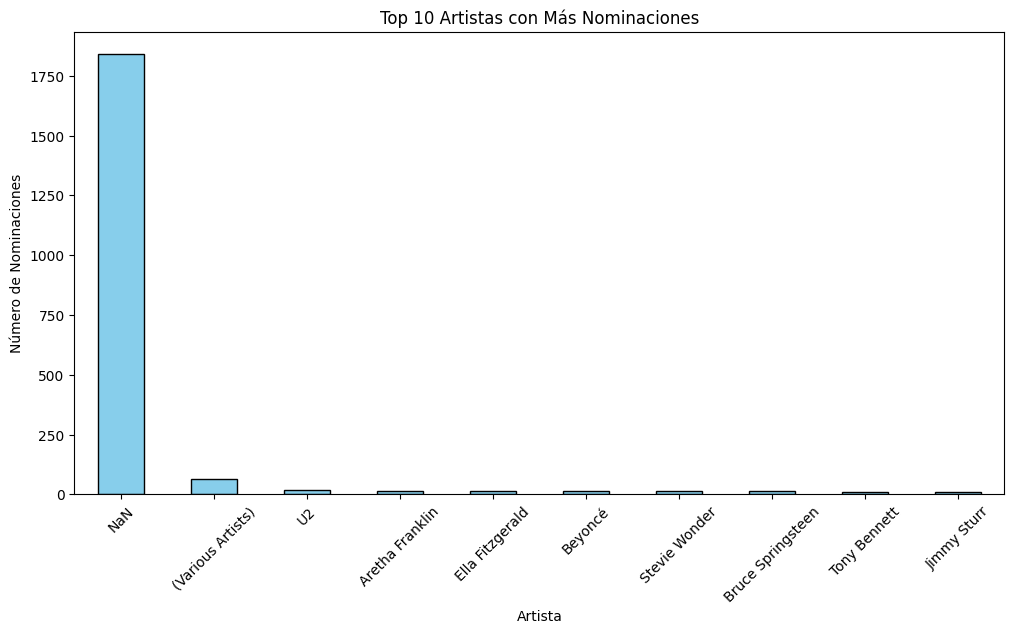

In [ ]:
top_nominees = df["artist"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_nominees.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Artistas con Más Nominaciones")
plt.xlabel("Artista")
plt.ylabel("Número de Nominaciones")
plt.xticks(rotation=45)
plt.show()


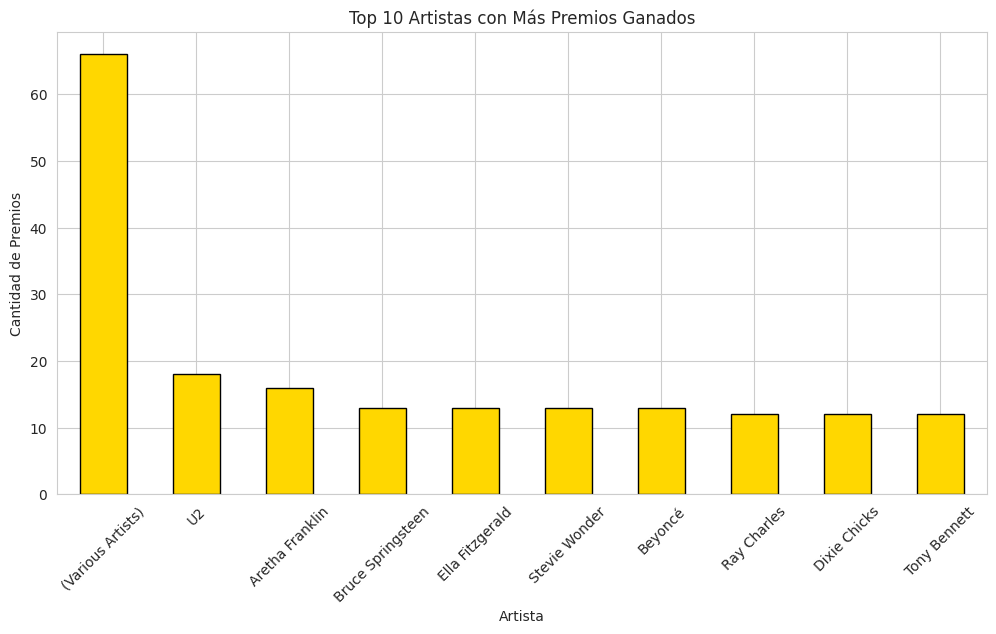

In [ ]:

winners = df[df["winner"] == True]

top_winners = winners["artist"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_winners.plot(kind='bar', color='gold', edgecolor='black')
plt.title("Top 10 Artistas con Más Premios Ganados")
plt.xlabel("Artista")
plt.ylabel("Cantidad de Premios")
plt.xticks(rotation=45)
plt.show()


Number of nominations per year

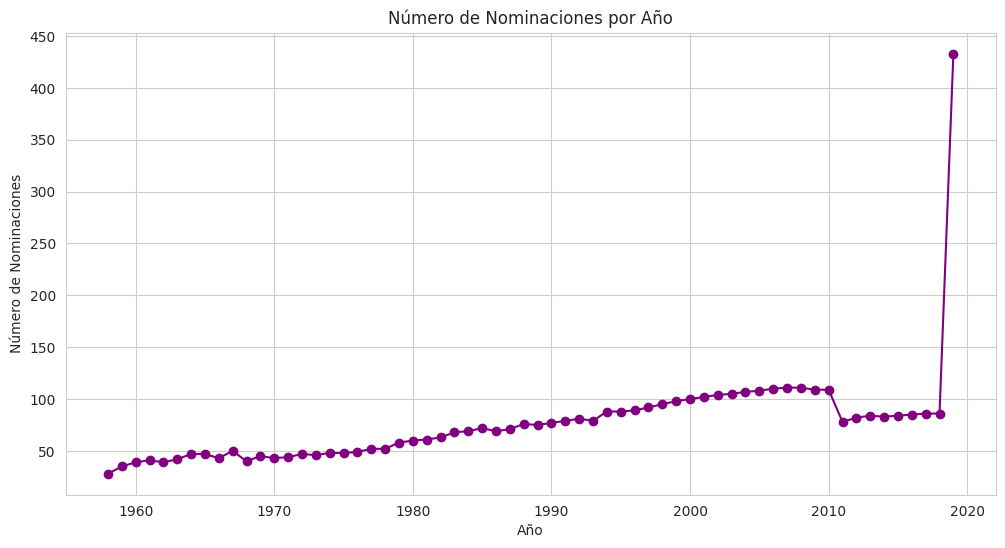

In [ ]:
nominations_per_year = df["year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(nominations_per_year.index, nominations_per_year.values, marker='o', linestyle='-', color='purple')
plt.title("Número de Nominaciones por Año")
plt.xlabel("Año")
plt.ylabel("Número de Nominaciones")
plt.grid(True)
plt.show()


Categories with the most nominations

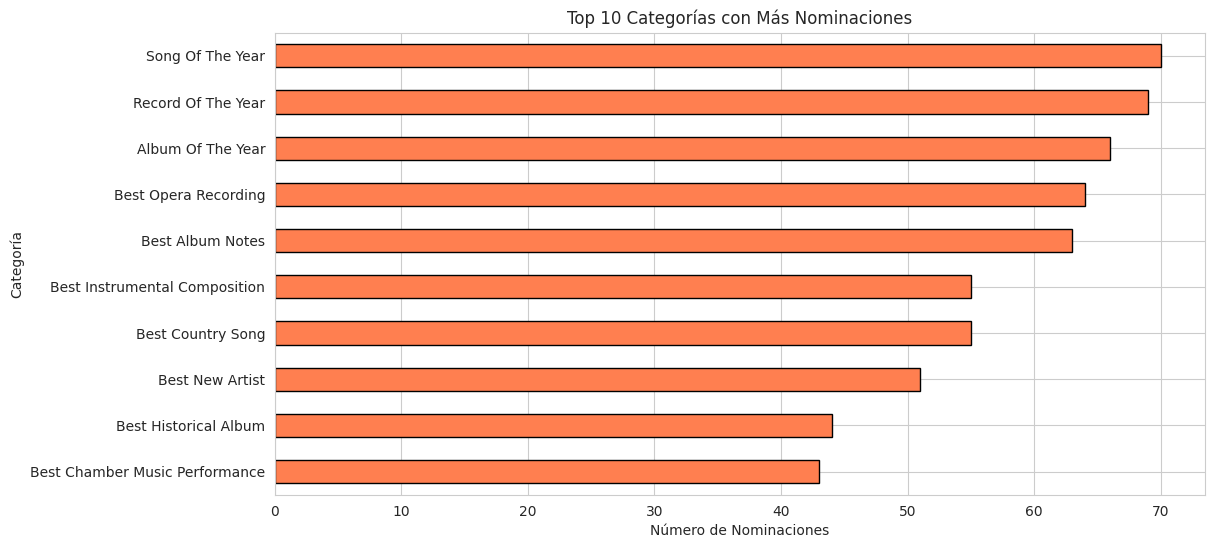

In [ ]:
top_categories = df["category"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_categories.plot(kind="barh", color="coral", edgecolor="black")
plt.title("Top 10 Categorías con Más Nominaciones")
plt.xlabel("Número de Nominaciones")
plt.ylabel("Categoría")
plt.gca().invert_yaxis()
plt.show()


Relationship between nominations and awards

/tmp/ipykernel_19781/86323559.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(nom_vs_win.index, rotation=45, ha="right")


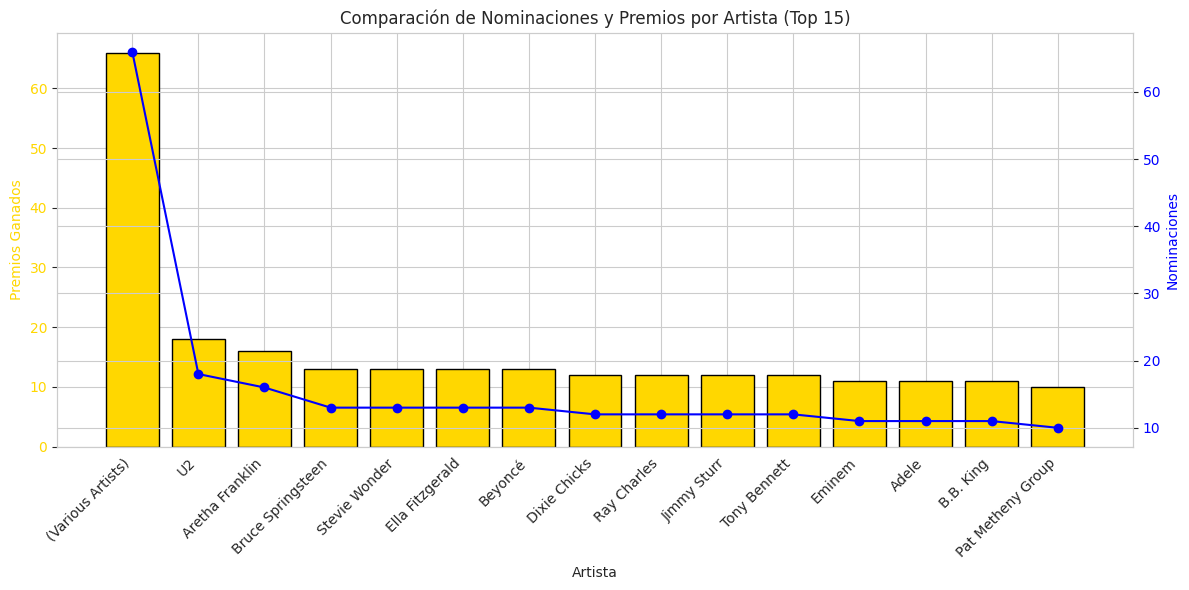

In [ ]:
nom_vs_win = df.groupby("artist").agg({"nominee": "count", "winner": "sum"}).sort_values(by="nominee", ascending=False).head(15)

sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(nom_vs_win.index, nom_vs_win["winner"], color="gold", edgecolor="black", label="Premios")
ax1.set_xlabel("Artista")
ax1.set_ylabel("Premios Ganados", color="gold")
ax1.tick_params(axis="y", labelcolor="gold")
ax1.set_xticklabels(nom_vs_win.index, rotation=45, ha="right")


ax2 = ax1.twinx()
ax2.plot(nom_vs_win.index, nom_vs_win["nominee"], marker="o", linestyle="-", color="blue", label="Nominaciones")
ax2.set_ylabel("Nominaciones", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")


plt.title("Comparación de Nominaciones y Premios por Artista (Top 15)")
fig.tight_layout()
plt.show()

# Conclusion and Further Analysis

This analysis provides insights into the Grammy Awards data, highlighting data quality and the performance of top artists. The dataset is complete for key fields like winner but has missing values in artist and workers. The visualization compares nominations and wins effectively.